### GRM모형으로 1년치 가상주가 생성

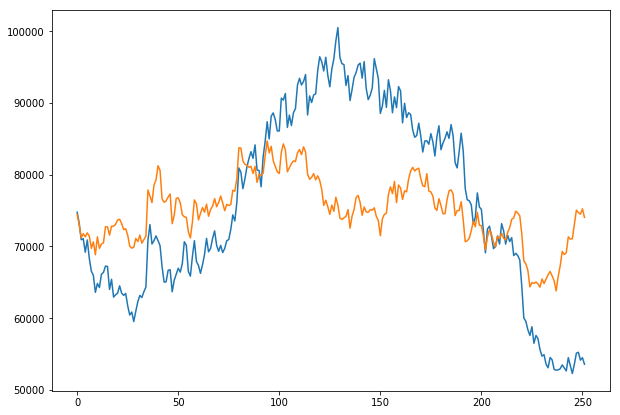

In [44]:
import matplotlib.pyplot as plt
import numpy as np
SA=[]
SB=[]
def GRM(SA0,SB0,roh,rf,s1,s2,n):
    for i in range(n):
        #종목A
        WA=np.random.normal(0,1,1)[0] #배열로 출력되기에 값만 가져온다(상관계수 구할 때 필요)
        SA.append(SA0*np.exp(s1*WA+(rf-0.5*(s1**2))))       
        #종목b
        WB=WA*roh+np.random.normal(0,1,1)[0]*np.sqrt(1-roh**2)
        SB.append(SB0*np.exp(s2*WB+(rf-0.5*(s2**2))))   
        SA0=SA[-1]
        SB0=SB[-1]
    return SA,SB
n=252
r=0.0175/n
sg1=0.4/np.sqrt(n)
sg2=0.3/np.sqrt(n)
SA0=75000
SB0=75000
plt.figure(figsize=(10,7))
S1=GRM(SA0,SB0,0.7,r,sg1,sg2,n)
plt.plot(SA)
plt.plot(SB)
plt.show()

#### 두 주가가 다를 때 표준화(Z-score 표준화: 주가-주가평균/주가표준편차)

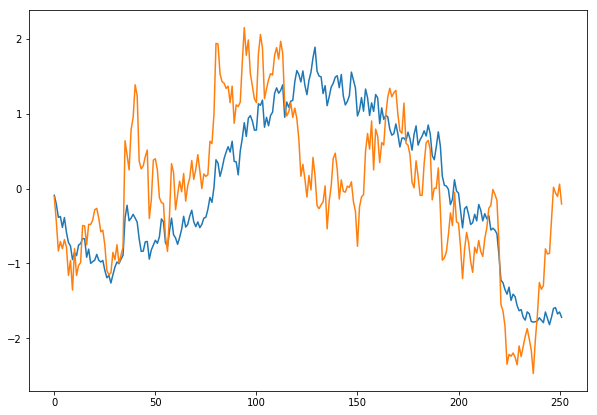

In [47]:
ZA=[(x-np.mean(SA))/np.std(SA) for x in SA]
ZB=[(x-np.mean(SB))/np.std(SB) for x in SB]
plt.figure(figsize=(10,7))
plt.plot(ZA)
plt.plot(ZB)
plt.show()

In [45]:
#수익률의 상관계수
    
DA=np.diff(SA)
DB=np.diff(SB)
RA=np.divide(DA,SA[:-1]) #
RB=np.divide(DB,SB[:-1])
print(np.corrcoef(RA,RB)[0,1])




0.7039043605213238


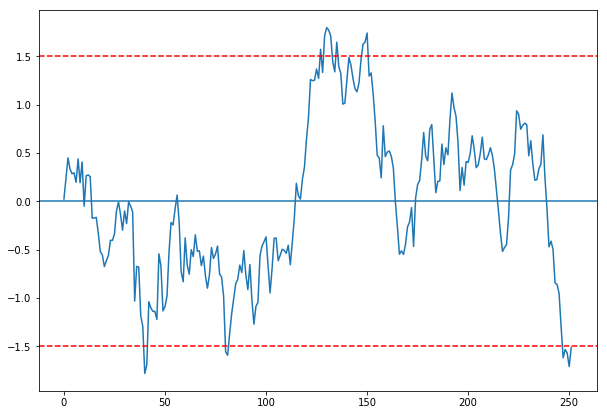

In [53]:
#표준화 주가의 차분시계열 = 페어트레이딩 스프레드
Spread=np.subtract(ZA,ZB)
plt.figure(figsize=(10,7))
plt.plot(Spread)
plt.axhline(y=np.mean(Spread)+1.5*np.std(ZA), ls='--',c='r')
plt.axhline(y=np.mean(Spread)-1.5*np.std(ZA), ls='--',c='r')
plt.axhline(y=0)
plt.show()

### GRM 모형에 적용

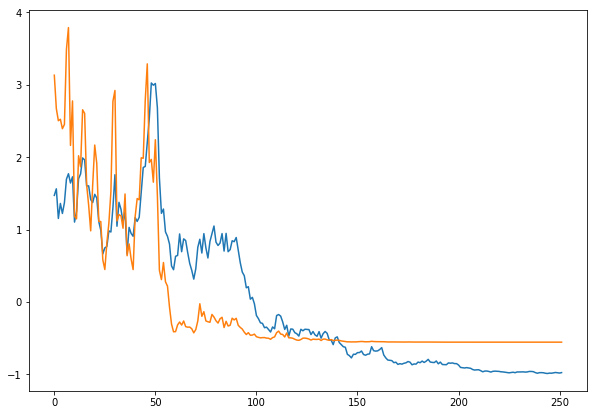

0.706692612653387


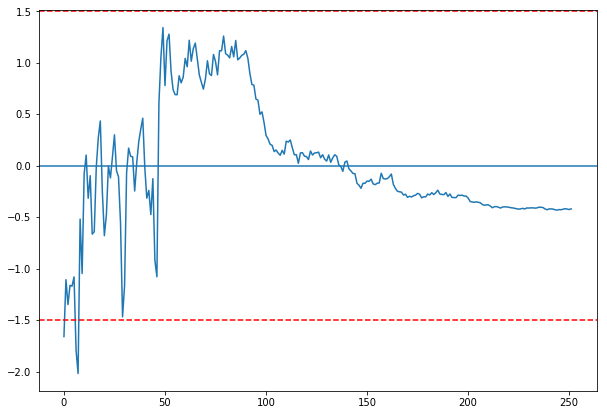

In [14]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

#이어지는 계산을 위해 wSaver생성
# wSaver='weight/8.gbm.h5'
# model.save_weights(wSaver)

def GBM(SA0,SB0,roh,rf,s1,s2,n):
    SA=[]
    SB=[]
    for i in range(n):
        #종목A
        WA=np.random.normal(0,1,1)[0] #배열로 출력되기에 값만 가져온다(상관계수 구할 때 필요)
        SA.append(SA0*np.exp(s1*WA+(rf-0.5*(s1**2))))       
        #종목b
        WB=WA*roh+np.random.normal(0,1,1)[0]*np.sqrt(1-roh**2)
        SB.append(SB0*np.exp(s2*WB+(rf-0.5*(s2**2))))   
        SA0=SA[-1]
        SB0=SB[-1]
    return SA,SB

SA,SB=GBM(251270, 41140, 0.7214, 0.0175/252,0.1083,0.2867,252) #041140:넥슨지티
pair=pd.DataFrame()
pair['netmb']=SA
pair['nx']=SB
pair=pair.dropna()

pair['npaA']=(pair['netmb']-np.mean(pair['netmb']))
pair['npaB']=(pair['nx']-np.mean(pair['nx']))
pair['spread']=pair['npaA']-pair['npaB']
pair['mspread']=pair['spread'].rolling(5).mean()
pair=pair.dropna()


ZA=[(x-np.mean(SA))/np.std(SA) for x in SA]
ZB=[(x-np.mean(SB))/np.std(SB) for x in SB]
plt.figure(figsize=(10,7))
plt.plot(ZA)
plt.plot(ZB)
plt.show()

#상관계수
DA=np.diff(SA)
DB=np.diff(SB)
RA=np.divide(DA,SA[:-1]) #SA[:-1]-->DA array 각 항에 대해 브로드캐스팅
RB=np.divide(DB,SB[:-1])
print(np.corrcoef(RA,RB)[0,1])

Spread=np.subtract(ZA,ZB)
plt.figure(figsize=(10,7))
plt.plot(Spread)
plt.axhline(y=np.mean(Spread)+1.5*np.std(ZA), ls='--',c='r')
plt.axhline(y=np.mean(Spread)-1.5*np.std(ZA), ls='--',c='r')
plt.axhline(y=0)
plt.show()
